# Importing & Cleansing Data

In [45]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix, auc,roc_auc_score,roc_curve,recall_score,classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)


In [44]:
## Load Datasets

# load dataset
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/MyDrive'
!pwd #Prints the present working directory
oulad_assessment = pd.read_csv('assessments.csv')
oulad_courses = pd.read_csv('courses.csv')
oulad_student_assessment = pd.read_csv('studentAssessment.csv')
oulad_student_info = pd.read_csv('studentInfo.csv')
oulad_student_registration = pd.read_csv('studentRegistration.csv')
oulad_student_vle = pd.read_csv('studentVle.csv')
oulad_vle = pd.read_csv('vle.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive


['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['TMA' 'Exam' 'CMA']


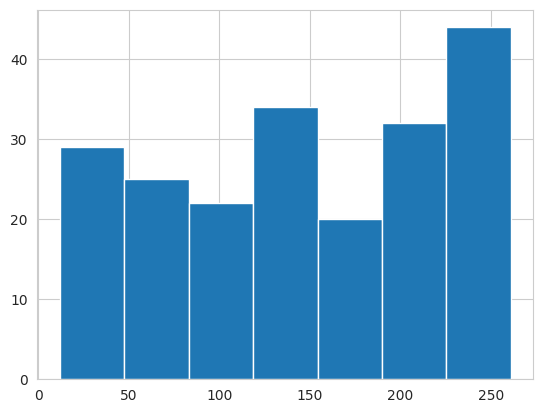

In [46]:
## Assessments
oulad_assessment['date'] = oulad_assessments['date'].fillna(int(oulad_assessments['date'].astype(float).mean()))
print(oulad_assessment['code_module'].unique())
print(oulad_assessment['assessment_type'].unique())
plt.hist(oulad_assessment['date'].astype(int), bins=7)
plt.show()

In [47]:
## Courses

oulad_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [48]:
## Student Assessment
oulad_student_assessment = oulad_student_assessment.dropna()
oulad_student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [49]:
## Student Registration
oulad_student_registration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in oulad_student_registration['date_unregistration']]
oulad_student_registration['date_registration']   = oulad_student_registration['date_registration'].fillna(0).astype(float).apply(abs)
oulad_student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,159.0,0
1,AAA,2013J,28400,53.0,0
2,AAA,2013J,30268,92.0,1
3,AAA,2013J,31604,52.0,0
4,AAA,2013J,32885,176.0,0


In [50]:
## Student Info
print(oulad_student_info['imd_band'].unique())

oulad_student_info['imd_band'] = oulad_student_info['imd_band'].fillna(oulad_student_info['imd_band'].mode()[0])
oulad_student_info.head()

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [51]:
## Student Vle
oulad_student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [52]:
# VLE
oulad_vle = oulad_vle.drop(['week_from', 'week_to'], axis = 1)
oulad_vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


# Merging Data & Analysis


Student VLE & VLE

In [53]:
# Merge Student VLE & VLE
student_vle_merge_vle = oulad_student_vle.merge(oulad_vle,
                                                on=['id_site', 'code_module', 'code_presentation'],
                                                how = 'left')


In [54]:
student_vle_merge_vle[(student_vle_merge_vle['id_student']==28400) & (student_vle_merge_vle['date']<0)].head(10)

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent
5,AAA,2013J,28400,546652,-10,8,forumng
6,AAA,2013J,28400,546876,-10,2,subpage
7,AAA,2013J,28400,546688,-10,15,oucontent
8,AAA,2013J,28400,546662,-10,17,oucontent
9,AAA,2013J,28400,546890,-10,1,url


In [55]:
student_vle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in student_vle_merge_vle['date']]

In [56]:
# Creating After clicks and Before Clicks columns based on the data

student_vle_merge_vle['After_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] =='After',
                                                 student_vle_merge_vle['sum_click'], 0)

student_vle_merge_vle['Before_Clicks']= np.where(student_vle_merge_vle['Click_Timing'] =='Before',
                                                 student_vle_merge_vle['sum_click'], 0)

In [57]:
# Create a new dataframe by Grouping the columns
student_vle_merge_vle_group = student_vle_merge_vle.groupby(['code_module',
                                                             'code_presentation',
                                                             'id_student']
                                                            ,as_index=False)[['sum_click', 'After_Clicks', 'Before_Clicks']].sum()

In [58]:
student_vle_merge_vle_group.isnull().sum()

,0
code_module,0
code_presentation,0
id_student,0
sum_click,0
After_Clicks,0
Before_Clicks,0


<Axes: xlabel='activity_type'>

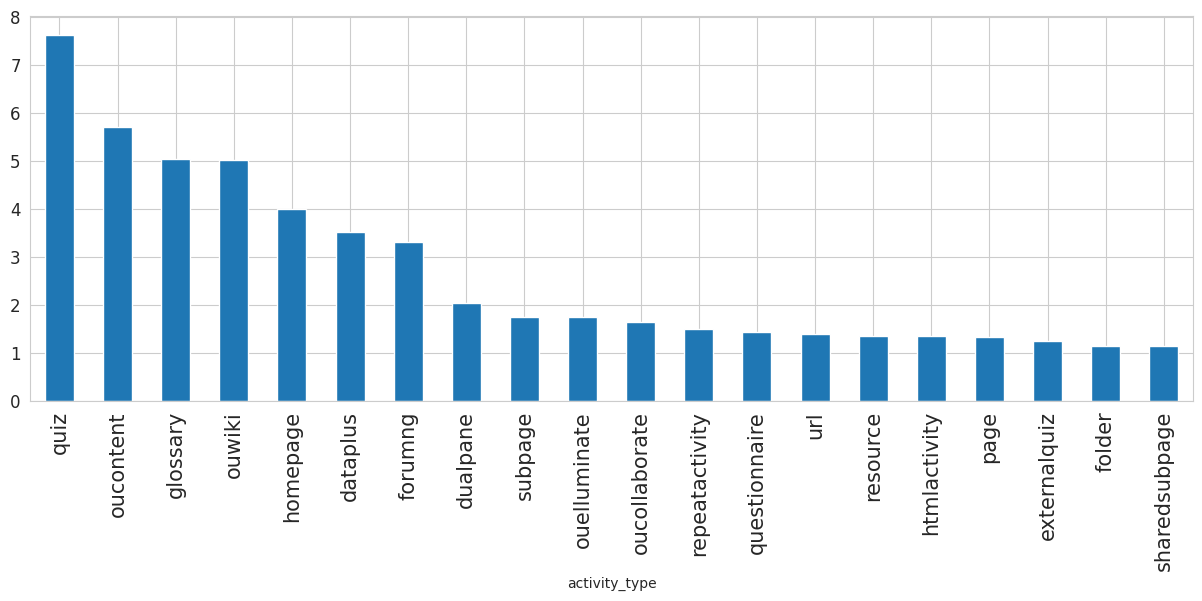

In [59]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_vle_merge_vle.groupby(['activity_type'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')

In [60]:
student_vle_merge_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4
1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11
4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1


Student Registration & Courses

In [61]:
student_registration_merge_courses = oulad_student_registration.merge(oulad_courses,
                                                                      on = ['code_module', 'code_presentation'],
                                                                      how = 'left')

In [62]:
student_registration_merge_courses['Year'] = student_registration_merge_courses['code_presentation'].str[0:4]
student_registration_merge_courses['Starting_Month'] = ['February' if code[-1] == 'B' else 'October'
                                                        for code in student_registration_merge_courses['code_presentation']]

In [63]:
student_registration_merge_courses

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,159.0,0,268,2013,October
1,AAA,2013J,28400,53.0,0,268,2013,October
2,AAA,2013J,30268,92.0,1,268,2013,October
3,AAA,2013J,31604,52.0,0,268,2013,October
4,AAA,2013J,32885,176.0,0,268,2013,October
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,4.0,0,269,2014,October
32589,GGG,2014J,2645731,23.0,0,269,2014,October
32590,GGG,2014J,2648187,129.0,0,269,2014,October
32591,GGG,2014J,2679821,49.0,1,269,2014,October


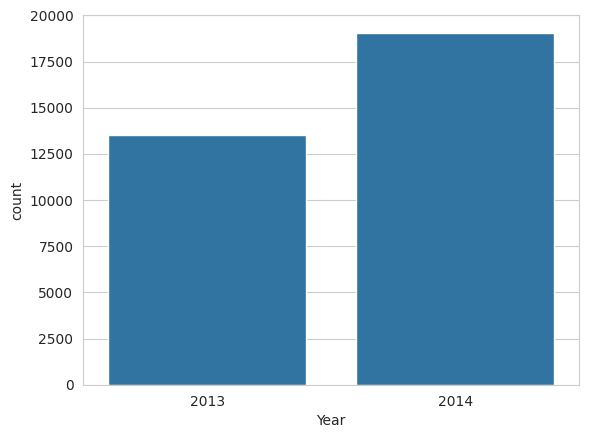

In [64]:
### This plot shows us that there are more registrations in 2014 as compared to 2013
sns.countplot(x ='Year', data = student_registration_merge_courses)

plt.show()

In [65]:
# From the below table we can see that course length doesn't have much difference for the student who withdrawn and students who completed the course

student_registration_merge_courses.groupby('date_unregistration', as_index=False)['module_presentation_length'].mean()

,date_unregistration,module_presentation_length
0,0,256.095378
1,1,255.819500


Assessments & Student Assessments

In [67]:
student_assessment_merge_assessment = oulad_student_assessment.merge(oulad_assessment,
                                                                     on = ['id_assessment'], how='left' )
student_assessment_merge_assessment.dtypes

,0
id_assessment,int64
id_student,int64
date_submitted,int64
is_banked,int64
score,float64
code_module,object
code_presentation,object
assessment_type,object
date,float64
weight,float64


In [69]:
# There would have been instances where students submitted their assignments later than the deadline. In this step,
# using the date_submitted (days after student recieved their assignment) column and date (deadline in days for the assignment)
# we can check whether their was a late submission or not (0 : Late, 1:OnTime)

student_assessment_merge_assessment['Late_submission'] = ['0' if int(student_assessment_merge_assessment['date_submitted'].iloc[i])
                                                          > int(student_assessment_merge_assessment['date'].iloc[i]) else '1'
                                                         for i in range(len(student_assessment_merge_assessment))]

print('Percentage of Late Submissions From Students are : ')
print((len(student_assessment_merge_assessment[student_assessment_merge_assessment['Late_submission']=='0'])/len(student_assessment_merge_assessment)*100))
print('We can see that approximately 30 percent of students submitted their assigments late')

Percentage of Late Submissions From Students are : 
29.958155624240963
We can see that approximately 30 percent of students submitted their assigments late


In [78]:
# Function to plot stacked plot
# Paramteres :-
# data :- Dataframe used for plotting
# column_one :- Column One to group by
# column_two : Column Two to group by
# agg_column : Column to count numbers

def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal     = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

Late_submission                  0          1
code_module code_module                      
AAA         AAA          25.810553  74.189447
BBB         BBB          47.472021  52.527979
CCC         CCC          69.063342  30.936658
DDD         DDD          30.566283  69.433717
EEE         EEE          14.544763  85.455237
FFF         FFF          10.345268  89.654732
GGG         GGG          10.049293  89.950707
Late_submission                  0          1
code_module code_module                      
AAA         AAA          25.810553  74.189447
BBB         BBB          47.472021  52.527979
CCC         CCC          69.063342  30.936658
DDD         DDD          30.566283  69.433717
EEE         EEE          14.544763  85.455237
FFF         FFF          10.345268  89.654732
GGG         GGG          10.049293  89.950707


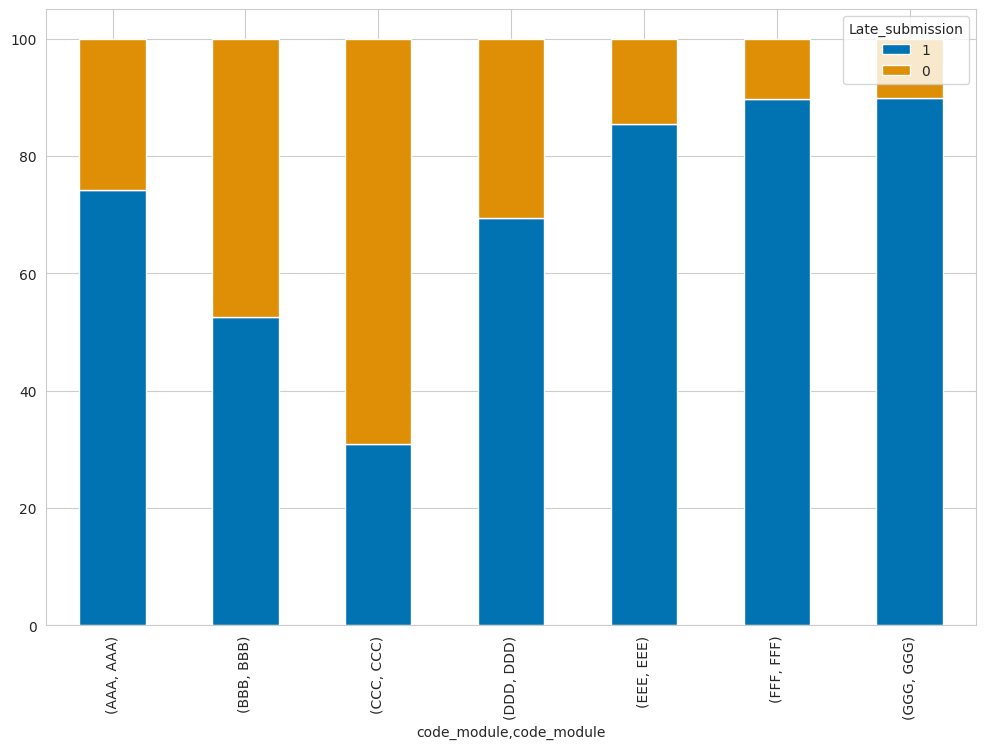

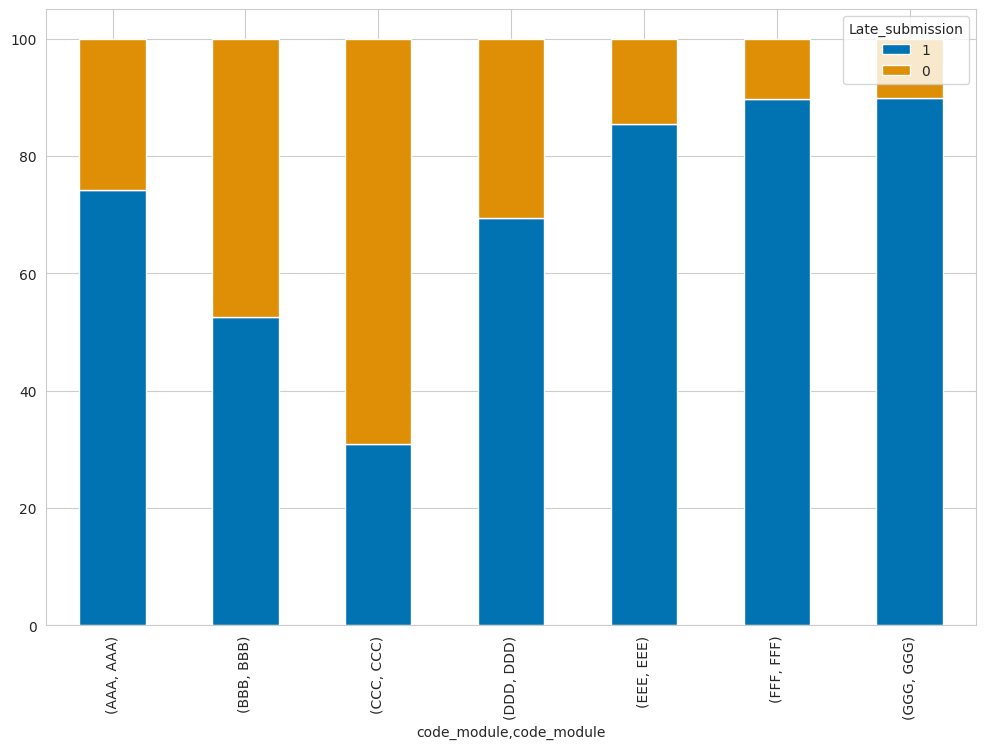

In [80]:
stacked_plot(student_assessment_merge_assessment, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))

stacked_plot(student_assessment_merge_assessment, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))


Late_submission                        0          1
Code_Category  Code_Category                       
STEM           STEM            26.072296  73.927704
Social_Science Social_Science  37.078578  62.921422


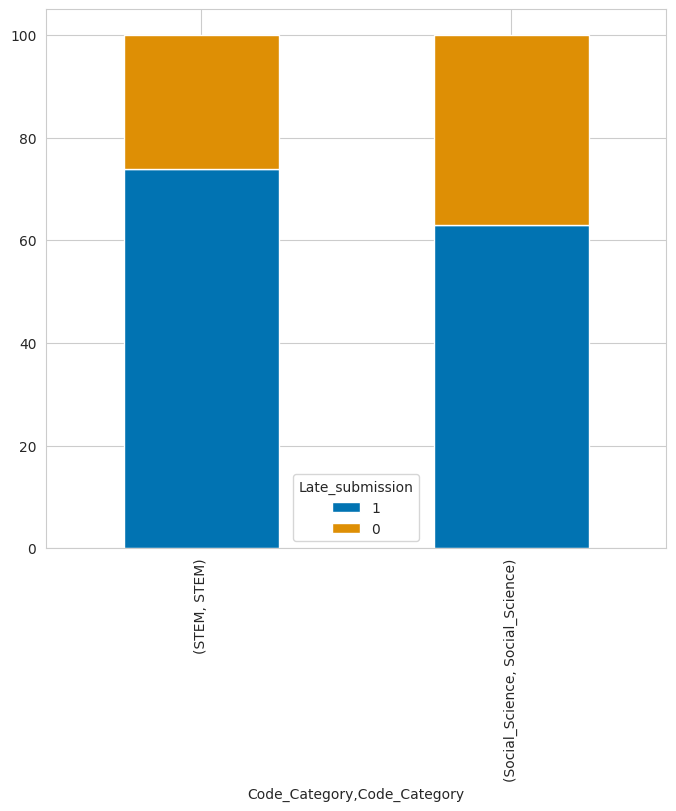

In [82]:
## Creating a column for Social Science and STEM field

student_assessment_merge_assessment['Code_Category'] = ['Social_Science' if student_assessment_merge_assessment['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                                        else 'STEM' for i in range(len(student_assessment_merge_assessment))]

# Social Science has more percentage of late submissions as compared to STEM
stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Late_submission', 'id_student', plot_size=(8, 7))

In [83]:
# As from the description of table we know that score less than 40 is considered as Fail and above that is pass


student_assessment_merge_assessment['Result'] = ['Fail' if int(student_assessment_merge_assessment['score'].iloc[i]) < 40
                                                        else 'Pass' for i in range(len(student_assessment_merge_assessment))]

Result                             Fail       Pass
Code_Category  Code_Category                      
STEM           STEM            5.132608  94.867392
Social_Science Social_Science  2.949136  97.050864


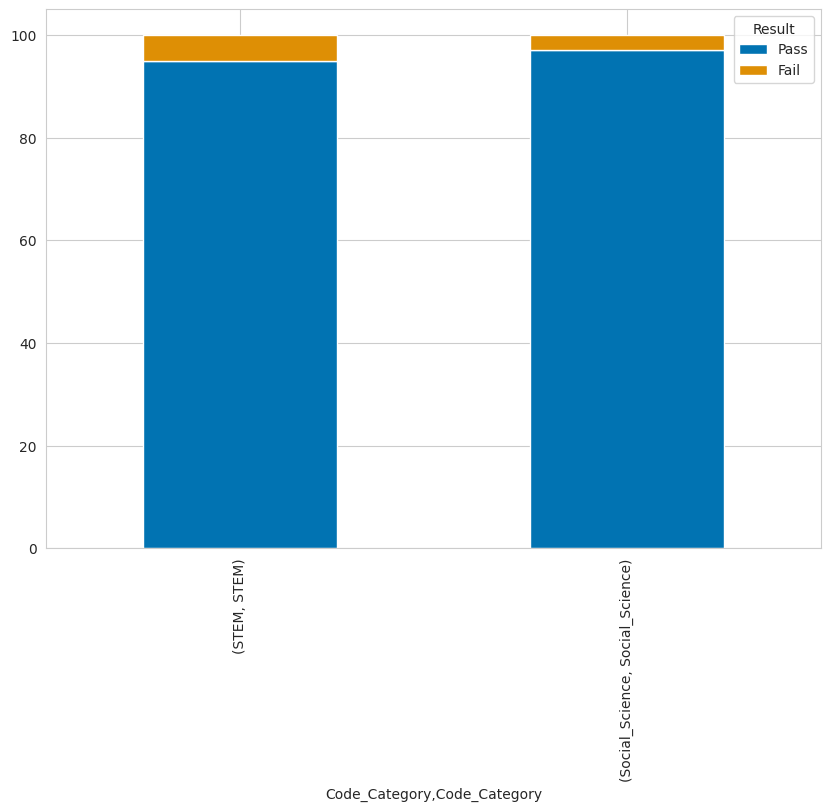

In [84]:
# Following Plot shows us the Ratio of Pass and Fail students in the form of plot
# Failure Rate in STEM is more as compared to Social Sciences

stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Result', 'id_student', plot_size=(10, 7))

Result                       Fail       Pass
code_module code_module                     
AAA         AAA          2.860776  97.139224
BBB         BBB          3.306266  96.693734
CCC         CCC          9.297903  90.702097
DDD         DDD          9.044297  90.955703
EEE         EEE          1.775298  98.224702
FFF         FFF          1.975570  98.024430
GGG         GGG          1.958593  98.041407


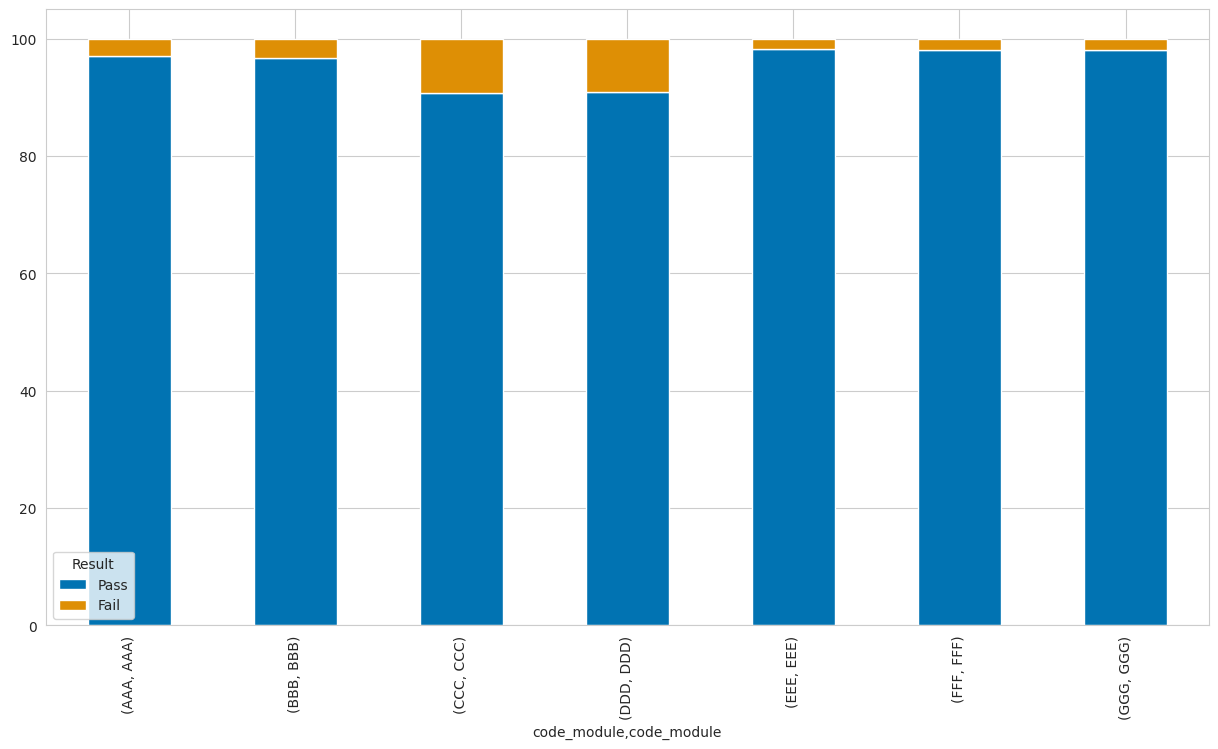

In [85]:
# We can see from the following plot that course DDD , CCC and BBB have the most failure rate. Out of the 3 courses 2 of them are from STEM.


stacked_plot(student_assessment_merge_assessment, 'code_module', 'Result', 'id_student', plot_size=(15, 8))

In [86]:
## Weightage of Assignment can have impact on the submissions and Result of students. I categorized the weight into

print(student_assessment_merge_assessment['weight'].unique())

percentage_segment = []

for percent in student_assessment_merge_assessment['weight']:
    if percent <= 10:
        percentage_segment.append('Low_Weightage')
    elif percent > 10 and percent <= 30:
        percentage_segment.append('Medium_Weightage')
    else:
        percentage_segment.append('High_Weightage')

student_assessment_merge_assessment['Weigthage'] = percentage_segment

[ 10.   20.   30.    5.   18.    1.    0.   35.    9.   22.    2.    7.
   8.  100.    7.5  12.5  15.    3.    4.    6.   17.5  25.   16.   28. ]


Result                                 Fail       Pass
Weigthage        Weigthage                            
High_Weightage   High_Weightage    8.463783  91.536217
Low_Weightage    Low_Weightage     3.329021  96.670979
Medium_Weightage Medium_Weightage  5.307333  94.692667


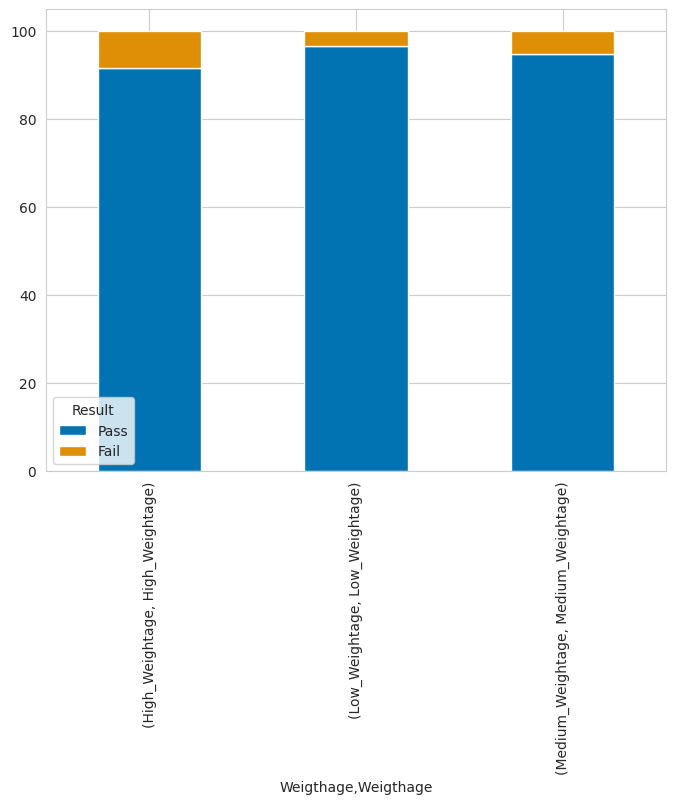

In [87]:
# We can see that Medium and High Weightage Assessments have high failure rate as compared to low

stacked_plot(student_assessment_merge_assessment, 'Weigthage', 'Result', 'id_student', plot_size=(8, 6))

Result                               Fail       Pass
Late_submission Late_submission                     
0               0                6.841630  93.158370
1               1                3.301011  96.698989


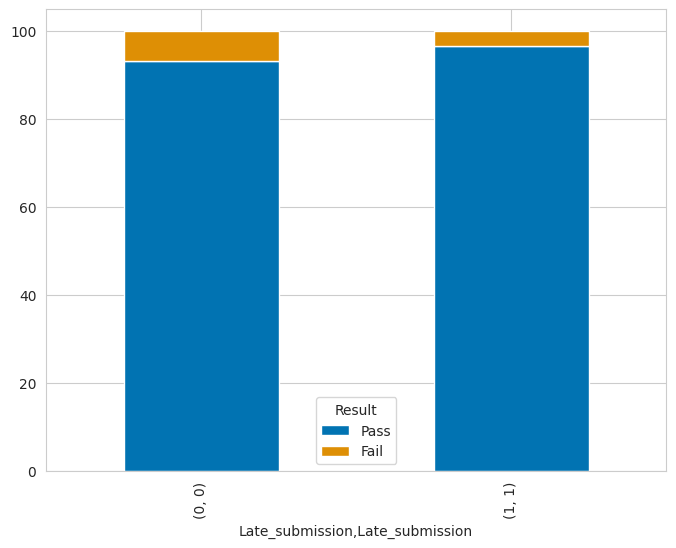

In [88]:
# Following Plot shows the ratio of Pass and Fail in Late_submission.
# We can clearly see that Late Submissions have more Failure Rate as compared to people who submit on time.

stacked_plot(student_assessment_merge_assessment, 'Late_submission', 'Result', 'id_student', plot_size=(8, 6))

In [89]:
student_assessment_merge_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,Late_submission,Code_Category,Result,Weigthage
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,0,Social_Science,Pass,Low_Weightage
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,0,Social_Science,Pass,Low_Weightage
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage


VLE & Student Info

In [90]:
student_info = oulad_student_info.merge(student_vle_merge_vle_group,
                                        on = ['code_module', 'code_presentation', 'id_student'],
                                        how = 'left')

student_info['sum_click']     = student_info['sum_click'].fillna(student_info['sum_click'].mean())
student_info['After_Clicks']  = student_info['After_Clicks'].fillna(student_info['After_Clicks'].mean())
student_info['Before_Clicks'] = student_info['Before_Clicks'].fillna(student_info['Before_Clicks'].mean())

<Axes: xlabel='final_result'>

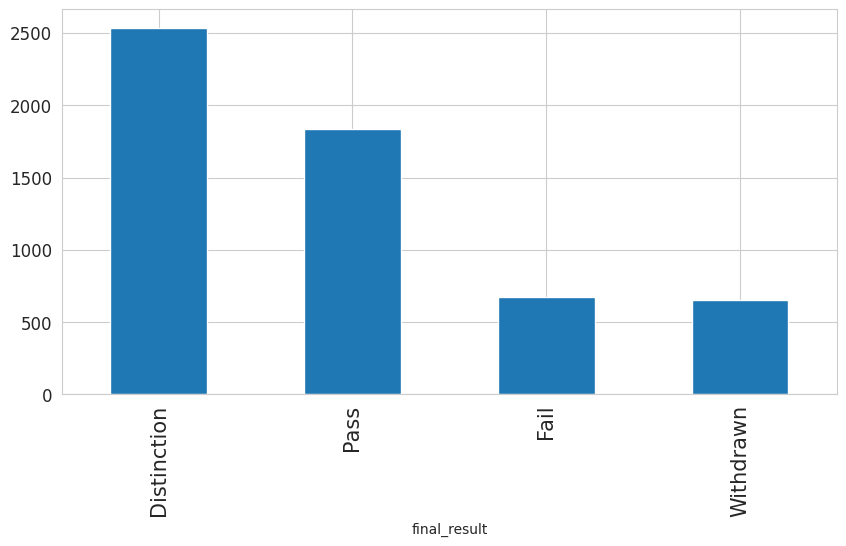

In [91]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['After_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='final_result'>

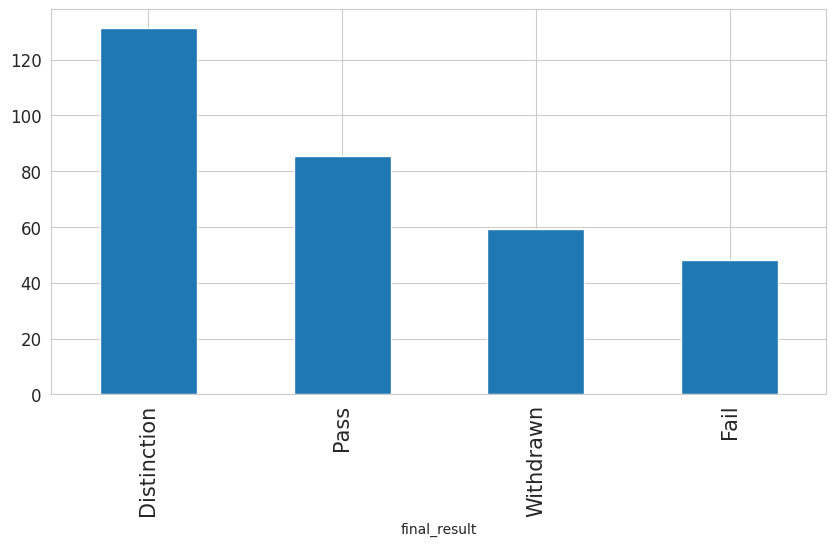

In [92]:
## Even from the clicks data before the course even started, we can see that more the clicks more are the chances for student to pass.

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='final_result'>

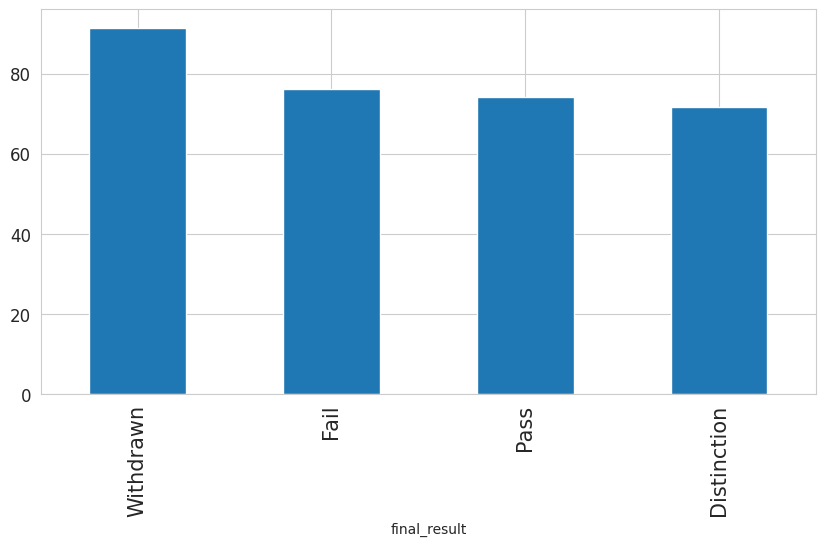

In [93]:
## People with less credits have more chances to pass with distinction or pass because they have to study less
## People who withdrew has more average credits as compared to another.

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='age_band'>

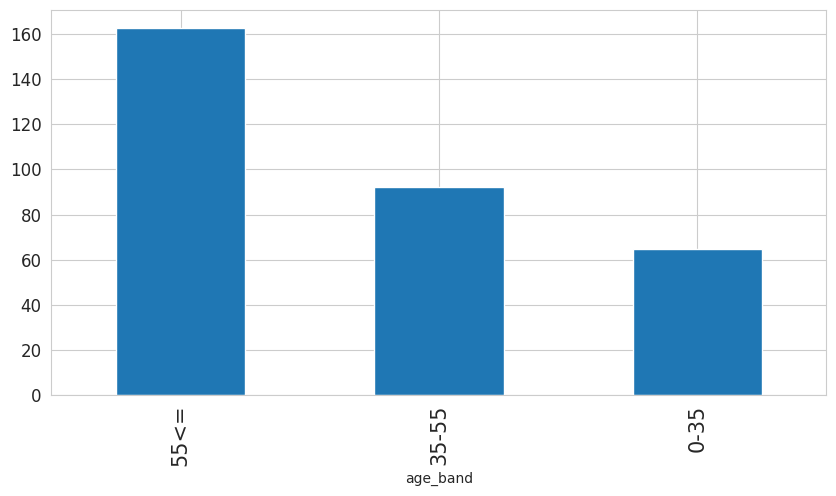

In [94]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['age_band'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='imd_band'>

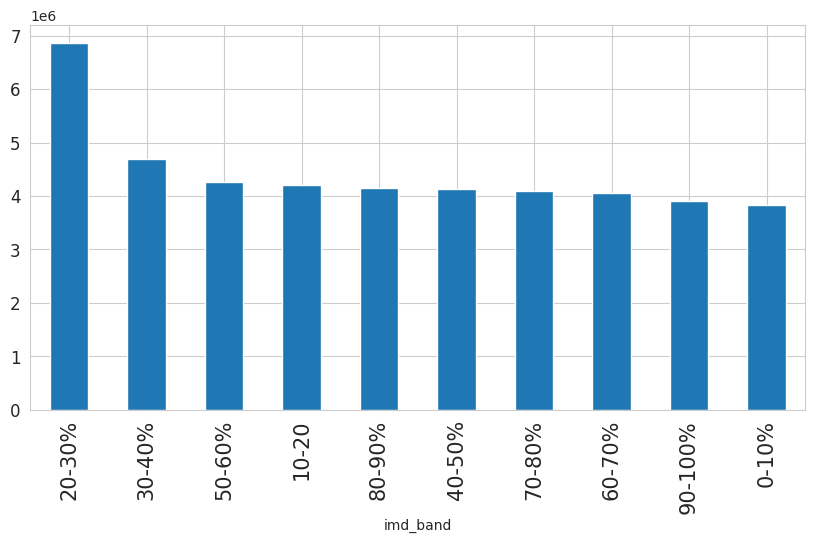

In [95]:

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['imd_band'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='gender'>

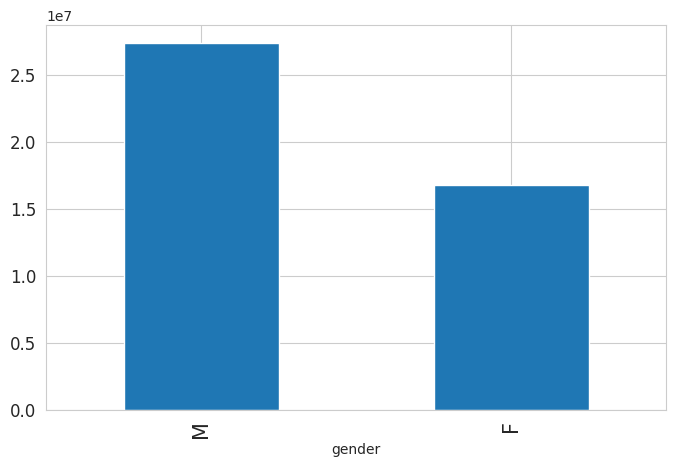

In [96]:
plt.figure(figsize = (8, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['gender'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

age_band  final_result
0-35      Pass            8469
          Withdrawn       7381
          Fail            5231
35-55     Pass            3800
          Withdrawn       2721
0-35      Distinction     1863
35-55     Fail            1792
          Distinction     1120
55<=      Pass              92
          Withdrawn         54
          Distinction       41
          Fail              29
Name: id_student, dtype: int64
final_result       Distinction       Fail       Pass  Withdrawn
age_band age_band                                              
0-35     0-35         8.119770  22.798989  36.911611  32.169630
35-55    35-55       11.873211  18.997138  40.284109  28.845542
55<=     55<=        18.981481  13.425926  42.592593  25.000000


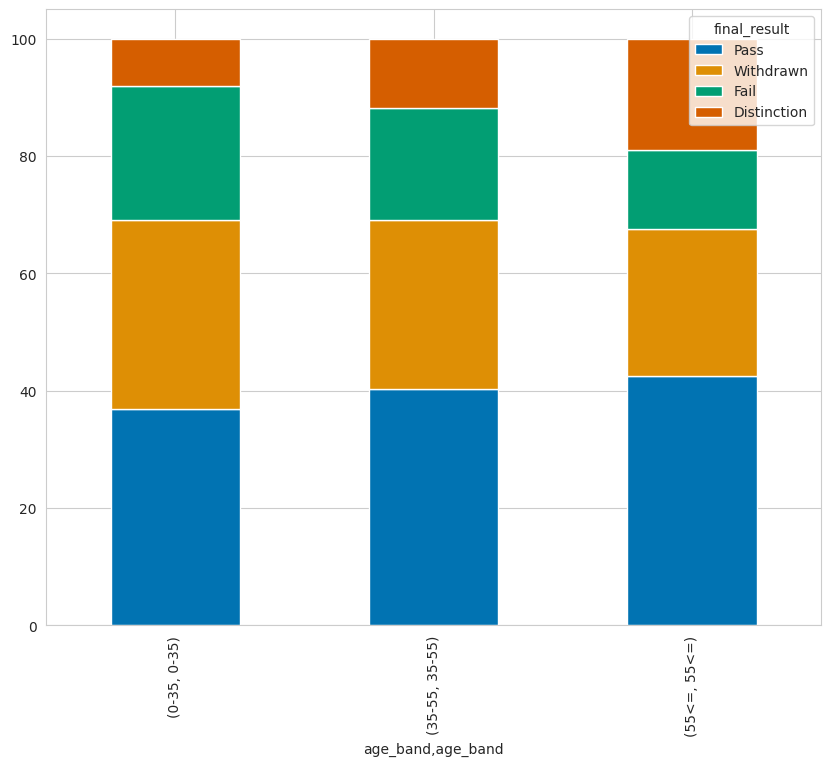

In [97]:
## Following plot shows us the number of students in each result category. Most of the data is in age band 0-55.
## There are very few data points for age >= 55.
## We can see that Failure and Withdrawn rate is greater in age_band 0-35

print(student_info.groupby(['age_band', 'final_result'])['id_student'].count().sort_values(ascending = False))
stacked_plot(student_info, 'age_band', 'final_result', 'id_student', plot_size=(10, 8))

final_result                                             Distinction  \
highest_education           highest_education                          
A Level or Equivalent       A Level or Equivalent          10.651477   
HE Qualification            HE Qualification               14.735729   
Lower Than A Level          Lower Than A Level              5.525156   
No Formal quals             No Formal quals                 4.610951   
Post Graduate Qualification Post Graduate Qualification    28.115016   

final_result                                                  Fail       Pass  \
highest_education           highest_education                                   
A Level or Equivalent       A Level or Equivalent        19.273763  41.381274   
HE Qualification            HE Qualification             16.701903  41.437632   
Lower Than A Level          Lower Than A Level           26.037392  33.325733   
No Formal quals             No Formal quals              27.377522  25.072046   
Post Grad

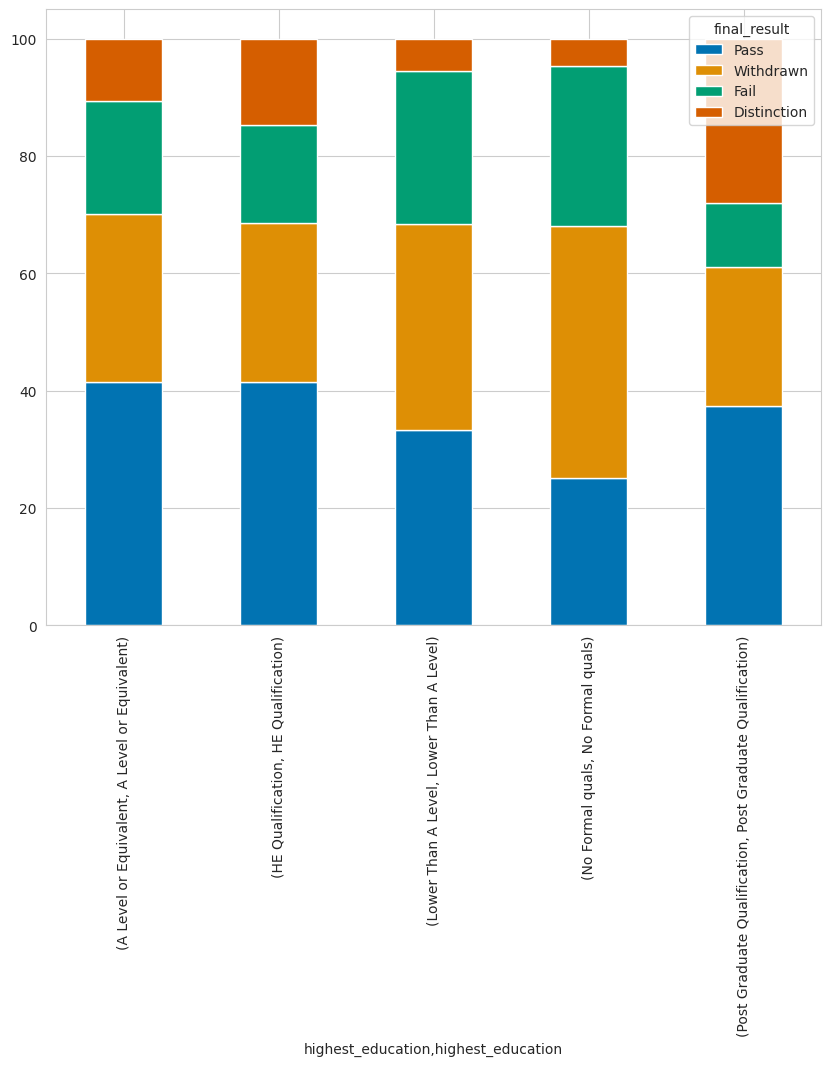

In [98]:
# We can see from the plot that Failure Rate and Withdrawal Rate is high in people who have NO FORMAL EDUCATION and who have LOWER THAN A LEVEL EDUCATION
# Failure Rate is lowest in people who has Post Graduation.


stacked_plot(student_info, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

In [99]:
student_info['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [100]:
## Manioulating the feature higher_education

student_info['highest_education'] = [0 if education in ['A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
                                    else 1 for education in student_info['highest_education']]

final_result                         Distinction       Fail       Pass  \
highest_education highest_education                                      
0                 0                     8.127042  22.606171  37.328494   
1                 1                    15.566131  16.339480  41.185802   

final_result                         Withdrawn  
highest_education highest_education             
0                 0                  31.938294  
1                 1                  26.908586  


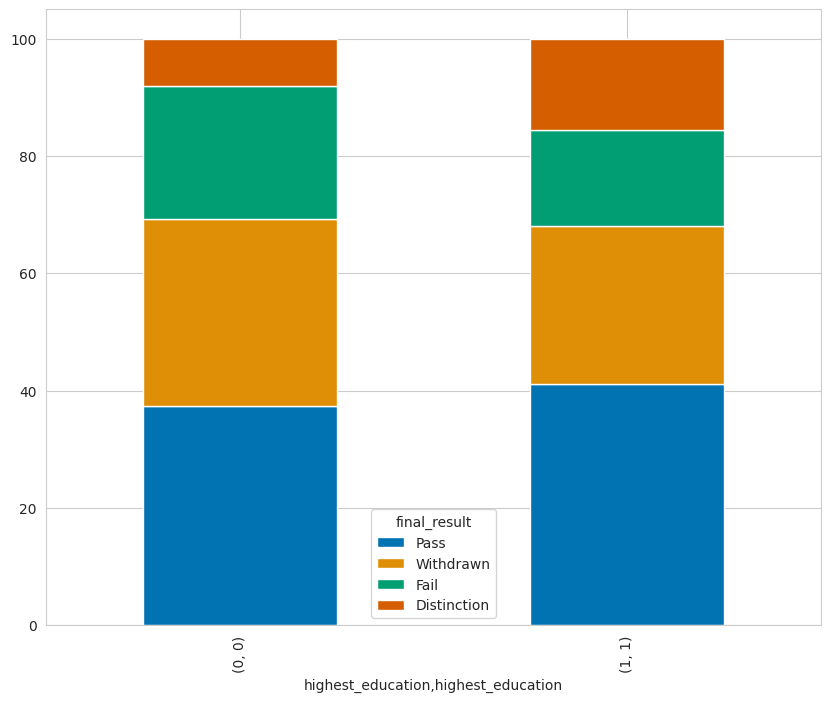

In [101]:
## We can see from the plot that students with lower education has higher failure rate than the ones who had higher education

stacked_plot(student_info, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

final_result                               Distinction       Fail       Pass  \
region               region                                                    
East Anglian Region  East Anglian Region      9.790419  20.898204  39.191617   
East Midlands Region East Midlands Region     8.456660  19.534884  37.251586   
Ireland              Ireland                  8.277027  22.043919  46.621622   
London Region        London Region            8.177861  23.134328  34.172886   
North Region         North Region            12.616566  17.937466  37.904553   
North Western Region North Western Region     7.329663  24.225740  32.863042   
Scotland             Scotland                 9.518282  24.724318  39.437028   
South East Region    South East Region       11.558503  17.764093  39.933681   
South Region         South Region            10.769728  17.593790  41.623545   
South West Region    South West Region       10.837438  19.088670  38.957307   
Wales                Wales              

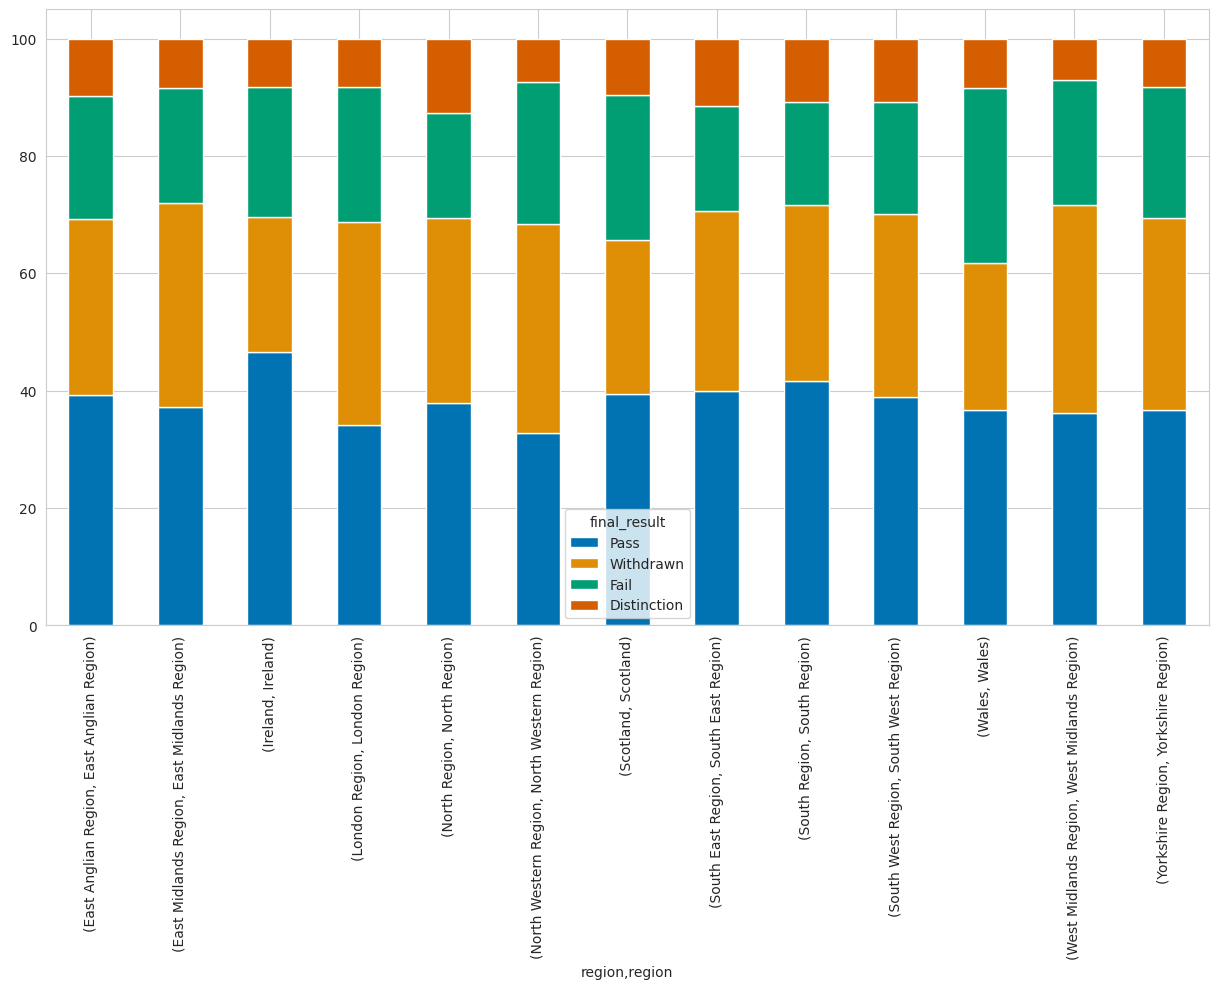

In [102]:
## We can see that Failure Rate and Withdrawal rate is similar in all the regions.

stacked_plot(student_info, 'region', 'final_result', 'id_student', plot_size=(15, 8))

final_result       Distinction       Fail       Pass  Withdrawn
imd_band imd_band                                              
0-10%    0-10%        5.073996  27.665358  30.081546  37.179100
10-20    10-20        5.432309  25.938567  33.191126  35.437998
20-30%   20-30%       9.695698  20.755509  36.873033  32.675761
30-40%   30-40%       8.900819  22.153151  38.005086  30.940944
40-50%   40-50%       8.998771  21.406634  37.592138  32.002457
50-60%   50-60%       9.507042  22.439181  39.276569  28.777209
60-70%   60-70%      10.292599  18.519793  41.617900  29.569707
70-80%   70-80%      10.871830  20.805835  40.639111  27.683223
80-90%   80-90%      11.875453  17.921796  42.179580  28.023172
90-100%  90-100%     14.116719  16.600946  43.414826  25.867508


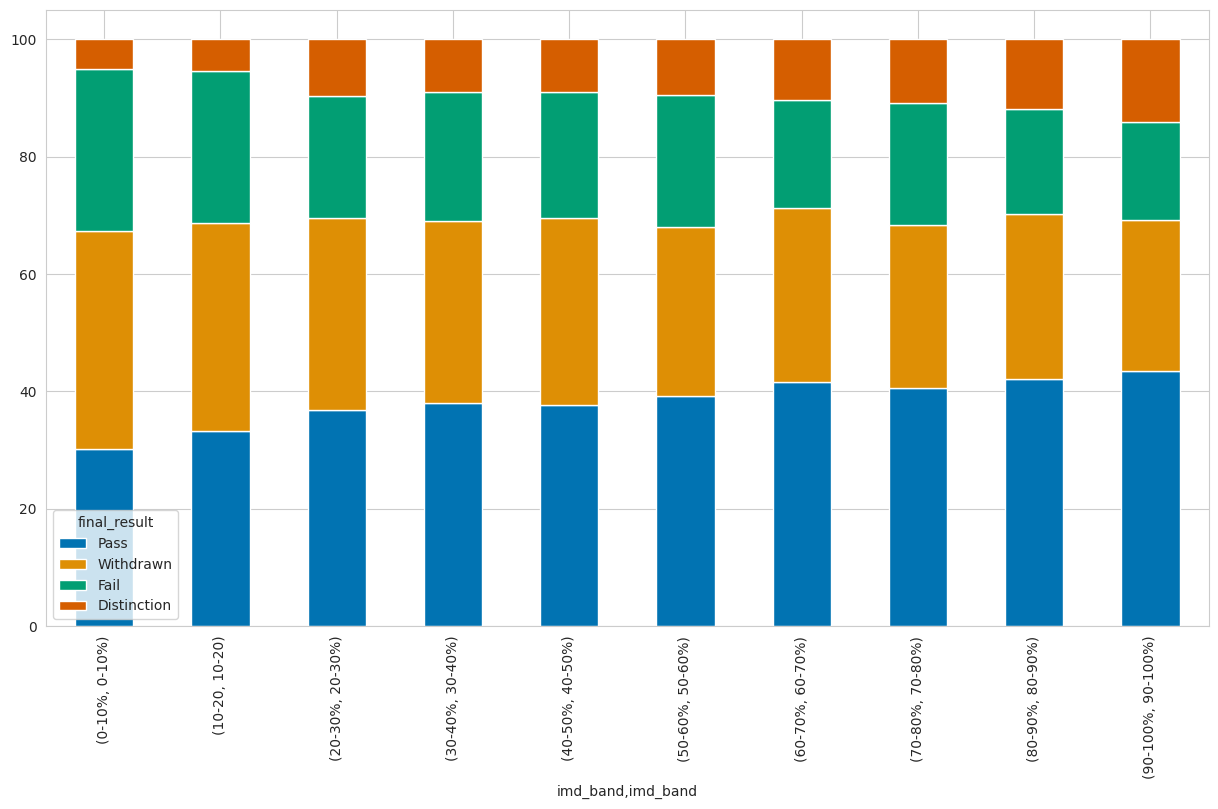

In [103]:
stacked_plot(student_info, 'imd_band', 'final_result', 'id_student', plot_size=(15, 8))

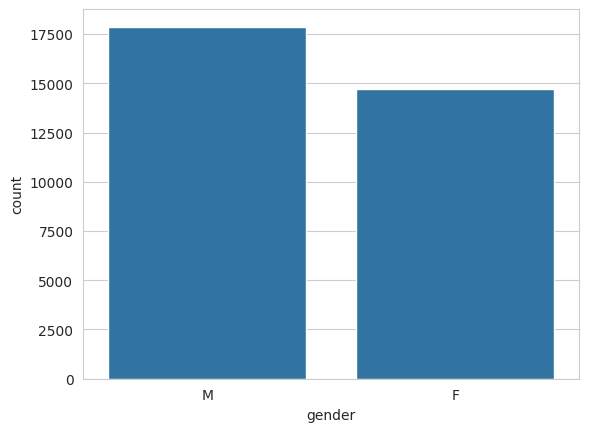

In [104]:
# We can see that Males are more in number as compared to females
sns.countplot(x ='gender', data = student_info)

plt.show()

final_result   Distinction       Fail       Pass  Withdrawn
gender gender                                              
F      F          9.471396  21.083028  38.965892  30.479685
M      M          9.118881  22.092308  37.068531  31.720280


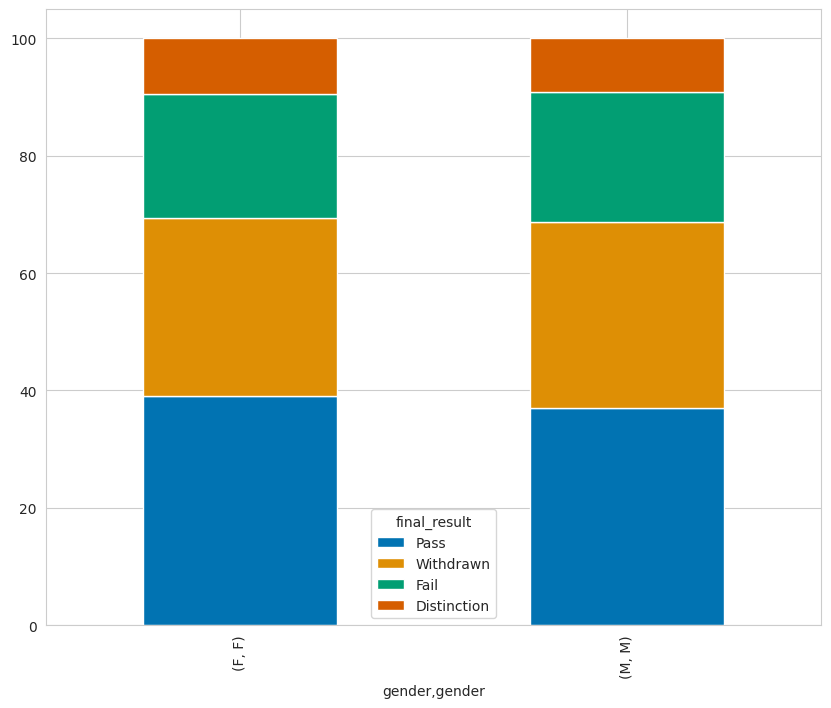

In [105]:
## We can see that there is no difference between the Withdrawal Rates and Failure Rates for both the gender.

stacked_plot(student_info, 'gender', 'final_result', 'id_student', plot_size=(10, 8))

final_result           Distinction       Fail       Pass  Withdrawn
disability disability                                              
N          N              9.517823  21.543376  38.659146  30.279656
Y          Y              7.048040  22.503161  31.099874  39.348925


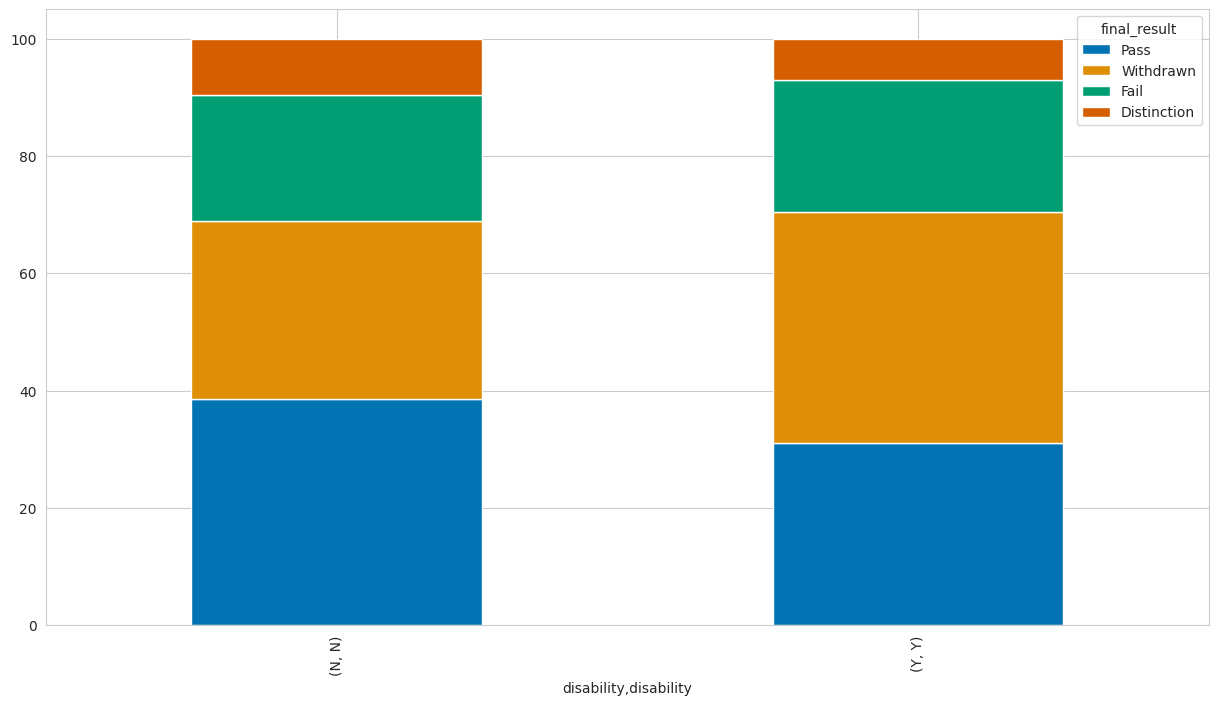

In [106]:
# Following plot shows us the results by disability.  Withdrawn Rate is more in People who are disable.


stacked_plot(student_info, 'disability', 'final_result', 'id_student', plot_size=(15, 8))

Student Info & Student Registration

In [107]:
student_registration_merge_courses = student_registration_merge_courses.drop('date_unregistration', axis = 1)

In [108]:
student_info = student_info.merge(student_registration_merge_courses,
                                 on = ['code_module', 'code_presentation', 'id_student'],
                                 how = 'left')

final_result                   Distinction       Fail       Pass  Withdrawn
Starting_Month Starting_Month                                              
February       February           8.896541  24.615631  34.769379  31.718450
October        October            9.515046  19.786123  39.885601  30.813231


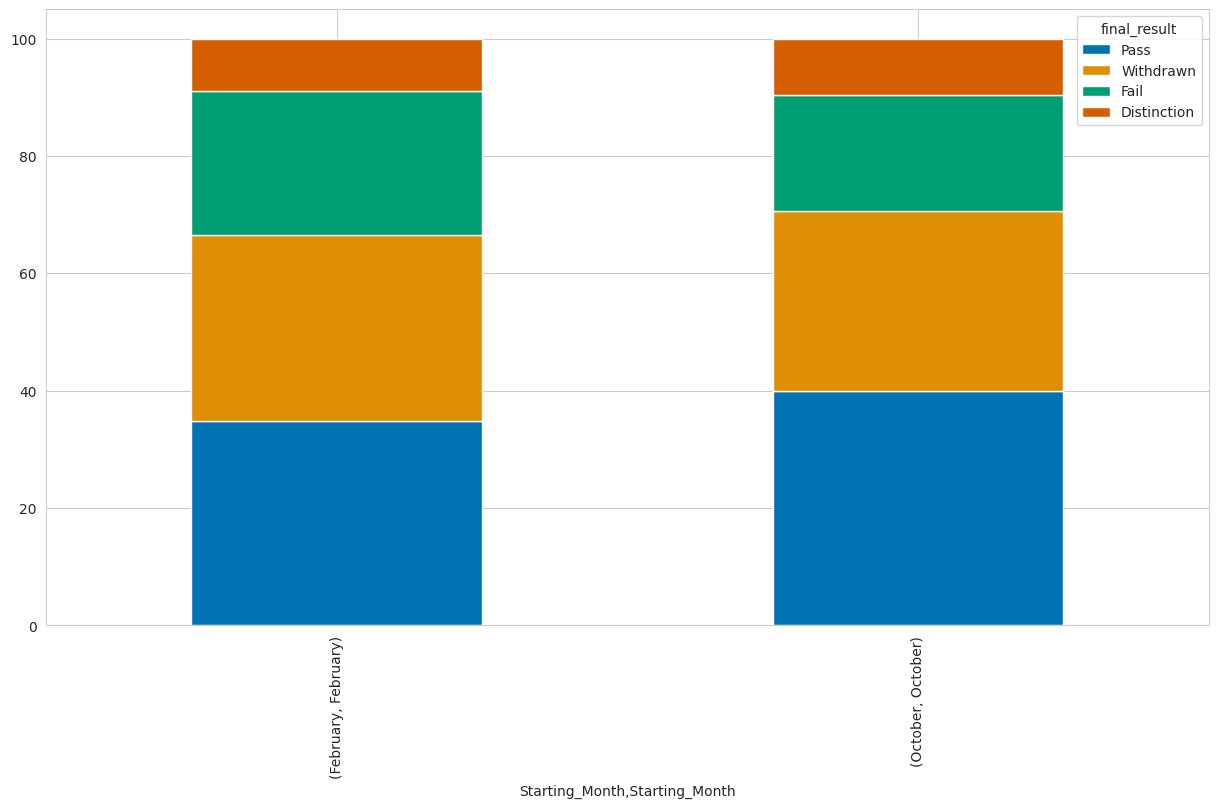

In [109]:
## Following Plot shows us the Result by Session. Failure Rate is more in people who took the course in February.
## Also withdrawn rate is slightly more in course starting in February.

stacked_plot(student_info, 'Starting_Month', 'final_result', 'id_student', plot_size=(15, 8))

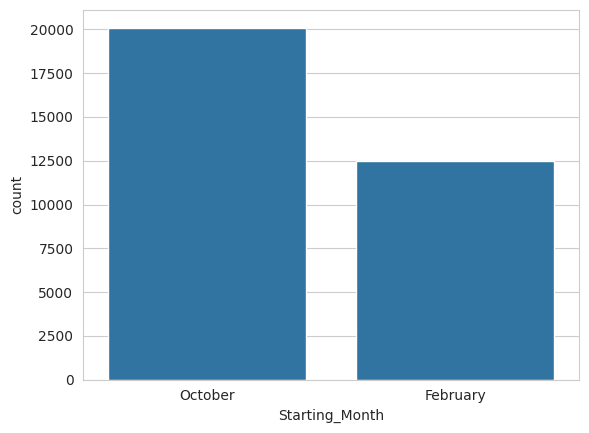

In [110]:
## There are less people who registered in February as compared to October. But still the failure and withdrawn rate
## is more for february. May be the students don't like content or the course in February.
sns.countplot(x ='Starting_Month', data = student_info)

# Show the plot
plt.show()

final_result                               Distinction       Fail       Pass  \
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       10.052426  20.164667  39.224517   
1                    1                        4.334647  30.585026  30.221279   
2                    2                        3.259259  34.962963  25.185185   
3                    3                        0.704225  40.140845  21.830986   
4                    4                        0.000000  30.769231  33.333333   
5                    5                        0.000000  46.153846  15.384615   
6                    6                       25.000000  25.000000   0.000000   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                     30.558390  
1                    1                     34.859048  
2                    2                     36.592593  
3   

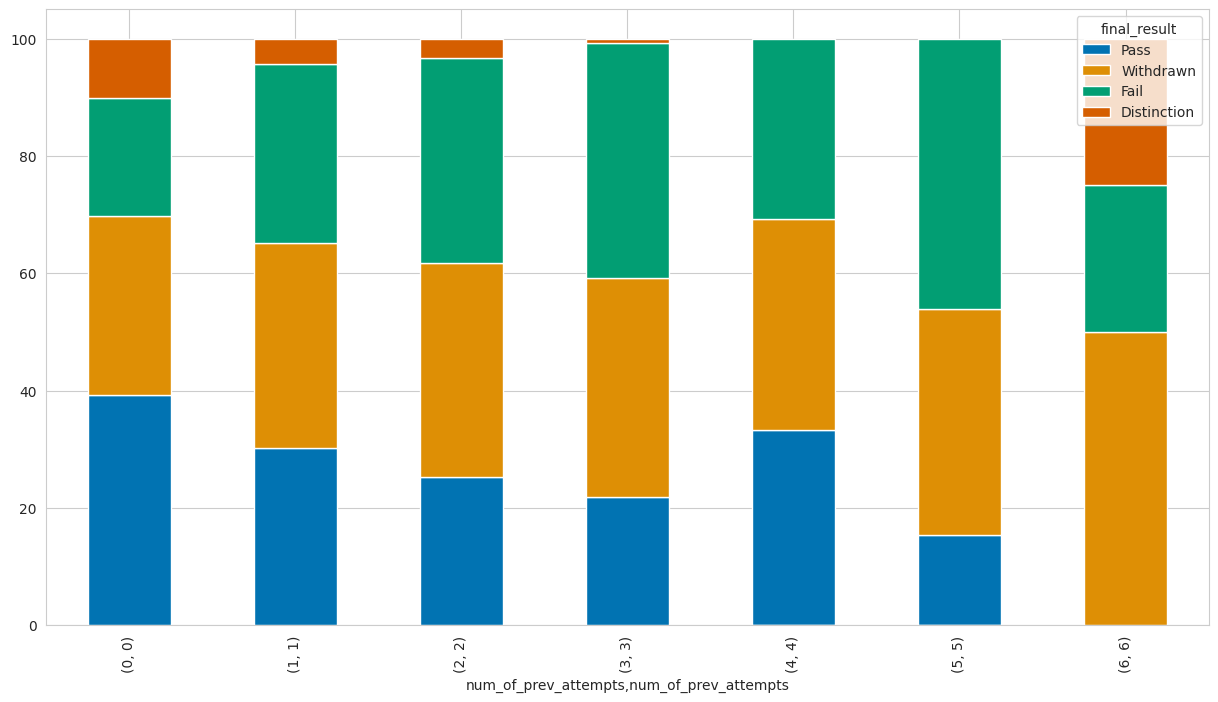

In [111]:
## We can clearly see from the plot that we have the least failure and withdrawn rate in the students who did not
## took the course before or number of previous attempts are zero.

stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))

In [112]:
student_info['num_of_prev_attempts'] = [0 if attempts == 0 else 1 for attempts in student_info['num_of_prev_attempts']]

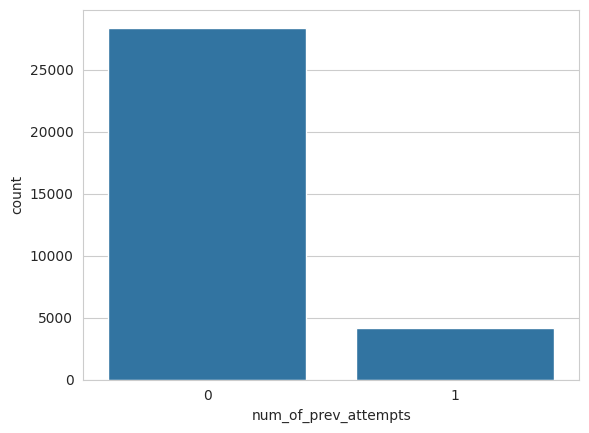

In [113]:
## Still there is imbalance in the feature but it's better than the initial.
sns.countplot(x ='num_of_prev_attempts', data = student_info)

plt.show()

final_result                               Distinction       Fail       Pass  \
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       10.052426  20.164667  39.224517   
1                    1                        4.002876  31.663471  29.074784   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                     30.558390  
1                    1                     35.258869  


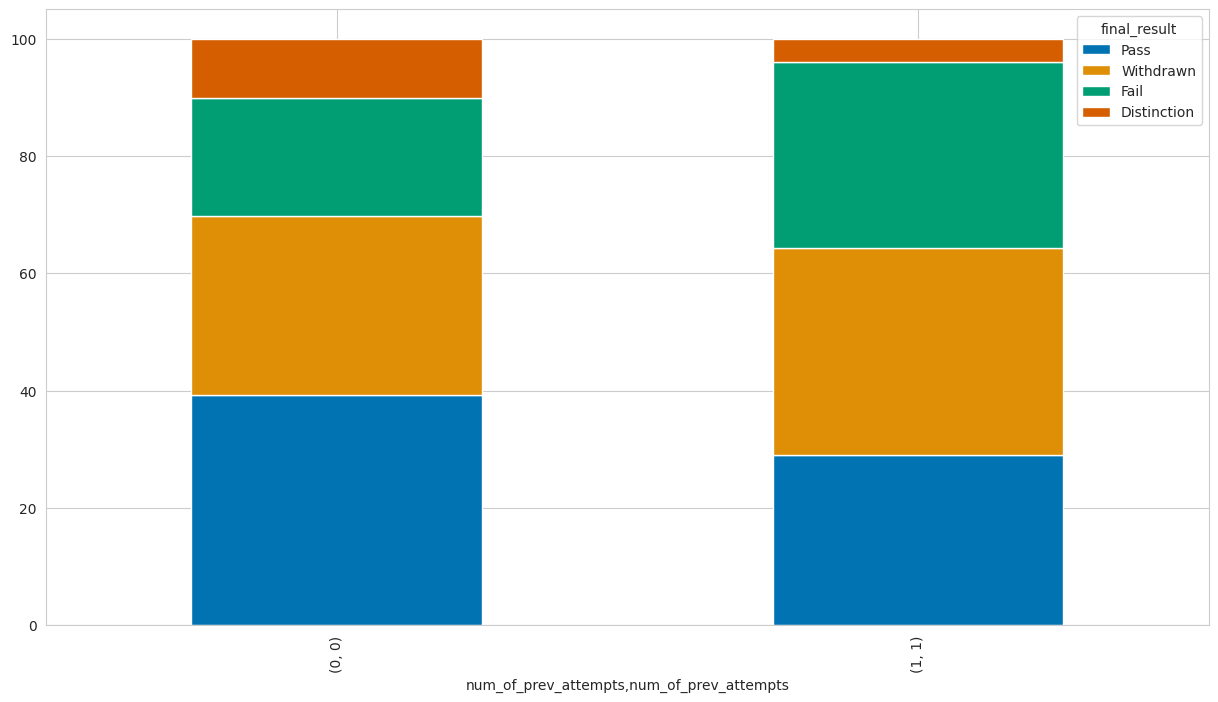

In [114]:
# We can clearly see that people with previous attempts have more failure and withdrawn rate.

stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))

final_result             Distinction       Fail       Pass  Withdrawn
code_module code_module                                              
AAA         AAA             5.882353  12.165775  65.106952  16.844920
BBB         BBB             8.559869  22.341636  38.905045  30.193450
CCC         CCC            11.231394  17.613893  26.612539  44.542174
DDD         DDD             6.106505  22.512755  35.507015  35.873724
EEE         EEE            12.133606  19.154738  44.103613  24.608044
FFF         FFF             8.631796  22.043288  38.366400  30.958516
GGG         GGG            15.627466  28.729282  44.119968  11.523283


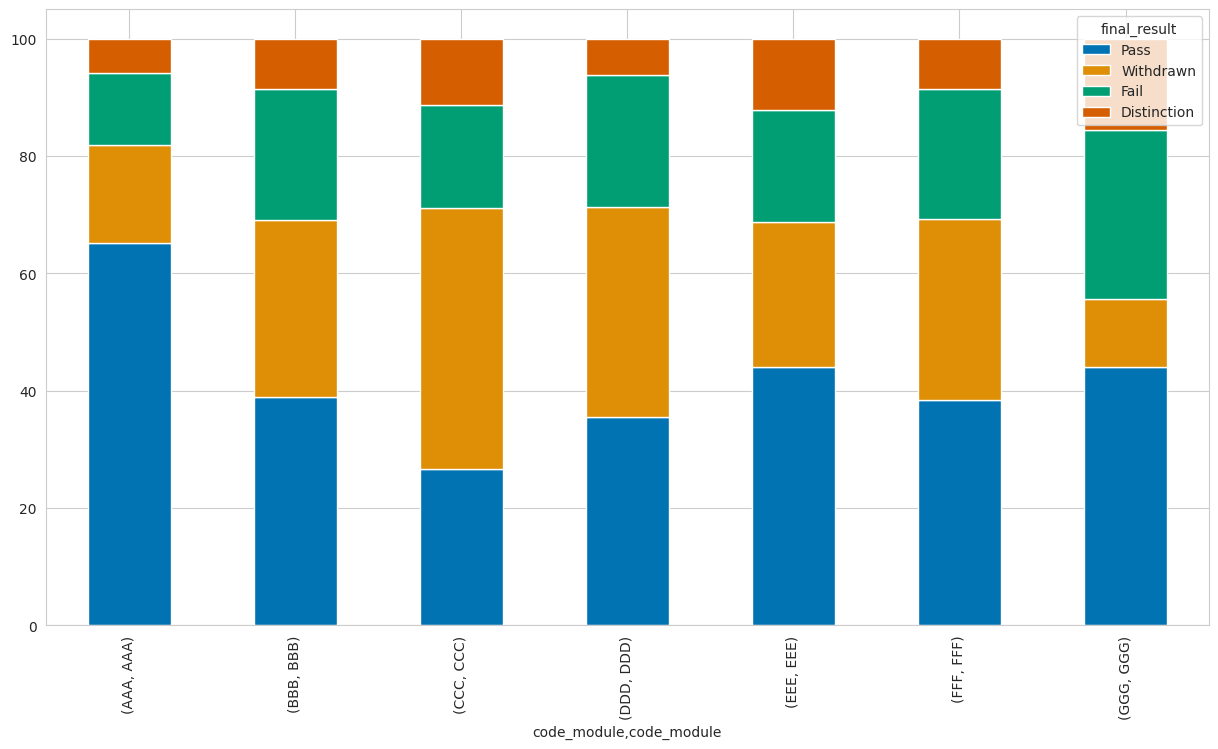

In [115]:
## We can see that

stacked_plot(student_info, 'code_module', 'final_result', 'id_student', plot_size=(15, 8))

In [116]:
student_info['Code_Category'] = ['Social_Science' if student_info['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                 else 'STEM' for i in range(len(student_info))]

final_result                   Distinction       Fail       Pass  Withdrawn
Code_Category  Code_Category                                               
STEM           STEM               8.910382  20.867209  35.879824  34.342585
Social_Science Social_Science     9.981235  23.107855  41.837191  25.073720


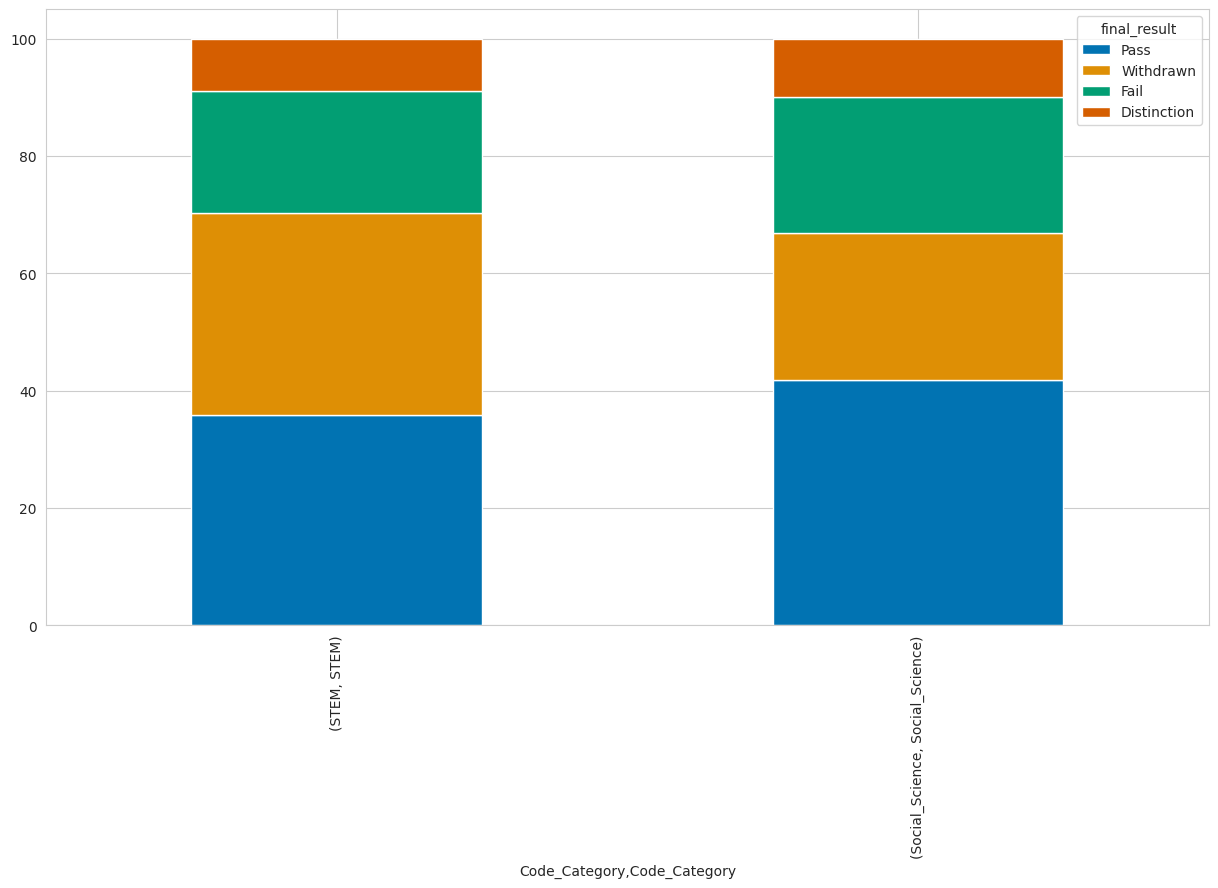

In [117]:
## From the following plot we can see that Failure Rate is higher in Social Science and Withdrawn rate is higher in STEM Courses.

stacked_plot(student_info, 'Code_Category', 'final_result', 'id_student', plot_size=(15, 8))

# Data Preparation

In [118]:
# In this step, I will remove code_module, code_presentation, id_student and Year as those won't have impact on the result

student_info = student_info.drop(['code_presentation', 'id_student', 'Year'], axis = 1)

In [119]:
student_info['date_registration'] = student_info['date_registration'].astype(float)

In [120]:
student_info['date_registration'].describe()

,date_registration
count,32593.000000
mean,69.492437
std,49.044122
min,0.000000
25%,29.000000
50%,57.000000
75%,100.000000
max,322.000000


In [121]:
# There are two types of categorical variables in the data.
# 1. NOMINAL :- Here there is no order in the categories
# 2. ORDINAL :- When there is order in the category

nominal_columns = ['gender', 'region', 'disability', 'Starting_Month', 'code_module', 'Code_Category']
ordinal_columns = ['highest_education', 'imd_band', 'age_band']

In [124]:
# Function to Encode the Categorical Data Columns
# Parameters 1. df :- Dataframe 2. Column_name :- Feature to encode

def categorical_encoding(df, column_name_list=[]):

    for column_name in column_name_list:
        print(df[column_name].unique())
        categorical_columns = pd.get_dummies(df[column_name], prefix = column_name,
                                             prefix_sep = '_', drop_first = False)
        df = pd.concat([df, categorical_columns], axis = 1)
        df = df.drop(column_name, axis = 1)
    return df


# Function to Label Encode the data
# Parameters :- 1. data :- Dataframe 2. columns_list :- List of columns to label encode

def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col]  = encoder.fit_transform(data[col])
    return data

In [125]:
data = labelEncoder(student_info, ordinal_columns)
data = categorical_encoding(student_info, nominal_columns)

['M' 'F']
['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
['N' 'Y']
['October' 'February']
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
['Social_Science' 'STEM']


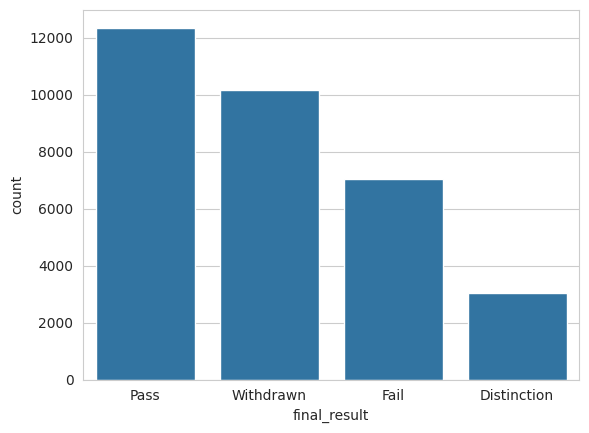

In [126]:
sns.countplot(x ='final_result', data = data)

plt.show()

In [127]:
## To built a simplified binary class model, I am labeling Distinction and Pass as 0 and Withdrawn and Failure as 1

data['Result']  = [0 if result in ['Pass', 'Distinction'] else 1 for result in data['final_result']]

In [128]:
## In this steP, I am creating a dropout column where we consider withdrawn as the dropout and everything else as no dropout
## '0' : Not Withdrawn, '1': 'Withdrawn'

data['dropout'] = [0 if result in ['Pass', 'Distinction', 'Fail'] else 1 for result in data['final_result']]

In [130]:
## Creating Feature and Target Dataframes

feature = data.drop(['final_result', 'Result'], axis = 1)
target  = data['Result']

In [131]:
## We can see that both the classes are close in numbers. So I will treat this as a balanced case of binary classification.

target.value_counts()

,count
Result,
1,17208
0,15385


In [132]:
### Here we will split our data into training and testing. As we have less data, I will keep 80% of the data for
### training and only 20% for testing. I would like to have more data where I can create three separate datasets
### for training, validation and testing. As our objective here is to find features which impact the decision whether
### student will fail or not, I will use most for training only.

X_train, X_test, Y_train, Y_test = train_test_split(feature, target,
                                                    test_size = 0.2,
                                                    random_state = 123,
                                                    stratify=data.final_result)

In [133]:
# In this step I will create a feature and target set for the dropout vs non-dropout case

feature_dropout = data.drop(['final_result', 'dropout', 'Result'], axis = 1)
target_dropout  = data['dropout']

In [134]:
target_dropout.value_counts()

,count
dropout,
0,22437
1,10156


In [135]:
## Splitting Data into training and test sets

X_train_dropout, X_test_dropout, Y_train_dropout, Y_test_dropout = train_test_split(feature_dropout, target_dropout,
                                                                                    test_size = 0.2,
                                                                                    random_state = 123,
                                                                                    stratify=target_dropout)

# Building & Evaluating Model

In [136]:
## Initializing the Random Forest Model

random_forest_model = RandomForestClassifier(n_estimators=100,
                                             random_state=123,
                                             max_depth=25,
                                             min_samples_split = 100,
                                             n_jobs=4)

In [137]:
## Fitting the model using Training Data

random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, min_samples_split=100, n_jobs=4,
                       random_state=123)

In [138]:
## Predicting on Test Data using fitted model

predictions_random = random_forest_model.predict(X_test)

In [139]:
print(confusion_matrix(Y_test, predictions_random))

[[2918  159]
 [ 506 2936]]


In [140]:
print("Accuracy of the model is ", accuracy_score(Y_test, predictions_random))

Accuracy of the model is  0.8979904893388556


In [141]:
print(classification_report(Y_test, predictions_random, digits=2))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3077
           1       0.95      0.85      0.90      3442

    accuracy                           0.90      6519
   macro avg       0.90      0.90      0.90      6519
weighted avg       0.90      0.90      0.90      6519



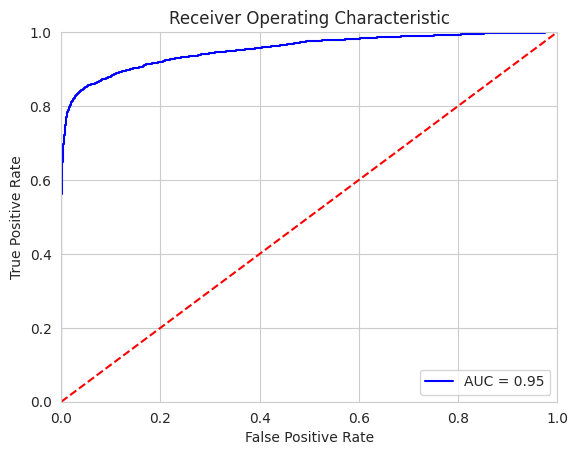

In [142]:
predictions_rf = random_forest_model.predict_proba(X_test)
preds = predictions_rf[:,1]
y_test = np.array(Y_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Grid Search

In [143]:
random_forest_model_best_fit = RandomForestClassifier(n_estimators=100,
                                                      random_state=123,
                                                      max_depth=30,
                                                      min_samples_split = 50,
                                                      n_jobs=4)

In [144]:
random_forest_model_best_fit.fit(X_train, Y_train)

RandomForestClassifier(max_depth=30, min_samples_split=50, n_jobs=4,
                       random_state=123)

In [145]:
predict_best_fit = random_forest_model_best_fit.predict(X_test)

In [146]:
print(classification_report(predict_best_fit, Y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3424
           1       0.85      0.95      0.90      3095

    accuracy                           0.90      6519
   macro avg       0.90      0.90      0.90      6519
weighted avg       0.90      0.90      0.90      6519



In [147]:
## We can see that region has close to None impact on the output of the model. So we will remove this feature.

importance = pd.concat([pd.DataFrame(X_train.columns),
                          pd.DataFrame(np.transpose(random_forest_model.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coeff']
importance = importance.sort_values('Coeff', ascending=False)
importance

,Features,Coeff
38,dropout,0.351216
6,After_Clicks,0.245894
5,sum_click,0.217119
7,Before_Clicks,0.058357
34,code_module_FFF,0.019404
37,Code_Category_Social_Science,0.012351
36,Code_Category_STEM,0.012193
4,studied_credits,0.011334
1,imd_band,0.010093
8,date_registration,0.007599


In [148]:
#Building amodel to predict whether student will dropout or not
# I am using class weight in this case because we have less samples for class = 1 which is dropout

random_forest_model_drop = RandomForestClassifier(n_estimators=100,
                                                  random_state=123,
                                                  max_depth=25,
                                                  min_samples_split = 100,
                                                  class_weight = {0: 1, 1: 2},
                                                  n_jobs=4)

In [149]:
random_forest_model_drop.fit(X_train_dropout, Y_train_dropout)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=25,
                       min_samples_split=100, n_jobs=4, random_state=123)

In [150]:
predict_dropout = random_forest_model_drop.predict(X_test_dropout)

In [151]:
print(classification_report(predict_dropout, Y_test_dropout))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4102
           1       0.80      0.67      0.73      2417

    accuracy                           0.82      6519
   macro avg       0.81      0.79      0.80      6519
weighted avg       0.82      0.82      0.81      6519



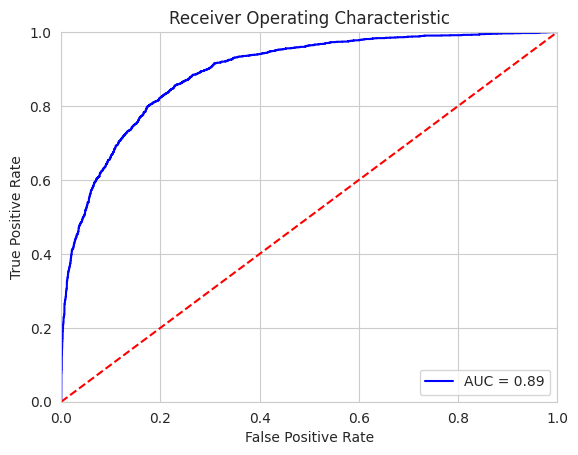

In [152]:
predictions_rf = random_forest_model_drop.predict_proba(X_test_dropout)
preds = predictions_rf[:,1]
y_test = np.array(Y_test_dropout)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [153]:
importance = pd.concat([pd.DataFrame(X_train_dropout.columns),
                          pd.DataFrame(np.transpose(random_forest_model_drop.feature_importances_))], axis = 1)
importance.columns = ['Features', 'Coeff']
importance = importance.sort_values('Coeff', ascending=False)
importance

,Features,Coeff
6,After_Clicks,0.341960
5,sum_click,0.303304
7,Before_Clicks,0.124920
4,studied_credits,0.034788
8,date_registration,0.024408
36,Code_Category_STEM,0.021686
37,Code_Category_Social_Science,0.021497
35,code_module_GGG,0.017961
34,code_module_FFF,0.014039
9,module_presentation_length,0.011269
